# WeRateDogs Wrangle and Analyze Data

## Table of Contents 
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Analysis & Visuals](#analysis)

<a id='intro'></a>
### Introduction

This is a Data Wrangling Project to clean the WeRateDogs tweet data into a functional and effective data set.  I will also be using this data to create a few visuals and insights into the analysis.

<a id='gather'></a>
## Gather

1. The WeRateDogs Twitter archive

2. The tweet image predictions

3. Twitter API for each tweet's JSON data using Python's Tweepy library 

#### 1. Twitter Archive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2. Tweet Image Predictions

In [5]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction_df = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1402,768970937022709760,https://pbs.twimg.com/ext_tw_video_thumb/76896...,1,Pomeranian,0.182358,True,golden_retriever,0.110658,True,mousetrap,0.086399,False
1026,710833117892898816,https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg,1,Pembroke,0.803742,True,Cardigan,0.189712,True,German_shepherd,0.001746,True
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
460,674793399141146624,https://pbs.twimg.com/media/CV1ZA3oWEAA1HW_.jpg,1,giant_schnauzer,0.119693,True,Afghan_hound,0.072763,True,miniature_schnauzer,0.063786,True
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True


#### 3. API & JSON

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# write the querying JSON data into tweet_json.txt
with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for tweet_id in twitter_archive_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended') # set mode to extended
            json.dump(tweet._json, f)
            f.write('\n')
        except: 
            print('error')

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [8]:
tweets = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

JSONDecodeError: Expecting ':' delimiter: line 1 column 897 (char 896)

In [9]:
tweets_df = pd.DataFrame()  # create a empty dataframe for map the tweet_data info 

tweets_df['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweets_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweets_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [10]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7872,36937
1,892177421306343426,5843,31780
2,891815181378084864,3856,23948
3,891689557279858688,8041,40259
4,891327558926688256,8701,38460


<a id='assess'></a>
## Assess

- twitter_archive_df = tweets text/link, rating, dog category, etc.
- image_prediction_df = how accurate the system is in predicting breed based on picture
- tweets_df = id, tweet RT and favorite counts

##### Twitter Archive

In [11]:
#checking the datatypes for potential ones that should  be altered
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
# set the display colwitdth to see entire column
pd.set_option('display.max_colwidth', -1)
twitter_archive_df['text'].head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [15]:
# see total missing values for each cat
twitter_archive_df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [16]:
twitter_archive_df.name.str.islower().sum()

109

In [17]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archive_df.rating_numerator.value_counts()
# I'll have to double check the extremely high numbers for validity

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [19]:
twitter_archive_df.rating_denominator.value_counts()
# After looking at the data, 10 is the standard denominator.  
# I'll double check to see if there is a specific reason for the other #'s'

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive_df.source.value_counts()
# main source is from an iphone

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

##### Image Prediction

In [21]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_prediction_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_prediction_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
image_prediction_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Siberian_husky               20 
Staffordshire_bullterrier    20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
beagle                       18 
Maltese_dog                  18 
teddy                        18 
Eskimo_dog                   18 
Shetland_sheepdog            18 
Rottweiler                   17 
Shih-Tzu                     17 
Lakeland_terrier             17 
kuvasz                       16 
Italian_greyhound            16 
          

In [25]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


##### Tweet df

In [26]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 3 columns):
id                3209 non-null int64
retweet_count     3209 non-null int64
favorite_count    3209 non-null int64
dtypes: int64(3)
memory usage: 75.3 KB


In [27]:
tweets_df.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,7872,36937
1,892177421306343426,5843,31780
2,891815181378084864,3856,23948
3,891689557279858688,8041,40259
4,891327558926688256,8701,38460


In [28]:
tweets_df.tail(5)

,id,retweet_count,favorite_count
3204,759197388317847553,2003,6235
3205,759159934323924993,1199,0
3206,759099523532779520,4295,14903
3207,759047813560868866,2093,6669
3208,758854675097526272,923,3647


In [29]:
tweets_df = tweets_df.drop_duplicates()
# no missing values were found, all data types are integer. Awesome!

<a id='clean'></a>
## Cleaning Plan

### Tidiness Issues
1. In twitter_archive_df, the separate columns of 'doggo', 'floofer', 'pupper', 'puppo' should be combined into one
2. To make the data cleaner and easier to read, I'm going to combine tweets_df and twitter_archive_df

### Quality Issues
##### Twitter_archive/tweets
1. A few dog names are wrong and should be fixed
2. To keep formatting the same, we'll have the dog names always have a capital letter to start
3. The standard denominator is 10 for the ratings; fix the ones that aren't. 
4. There are some abnormal numerators that need to be fixed, as well. 
5. Some columns have a lot of missing data, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp".  I don't really need these pieces of info so I'll just remove them.
6. The dtype for "timestamp" is wrong and should be fixed
7. The extremely long URL's should be shortened
8. The "expanded_urls" has few missing values.  These should be void when looking at the rating

##### Image Predictions
1. The names such as p1, p2, p3 could be confusing.  I'll clean these up to make it very easy to interpret
2. Make dog breed naming convention consistent; have capital letters at start of each name

## Cleaning

In [30]:
#Making a copy of each data set to ensure a fresh start and consistency
twitter_archive_clean = twitter_archive_df.copy()
image_prediction_clean = image_prediction_df.copy()
tweet_data_clean = tweets_df.copy()

##### Tidiness

1. In twitter_archive_df, the separate columns of 'doggo', 'floofer', 'pupper', 'puppo' should be combined into one

In [31]:
twitter_archive_clean[twitter_archive_clean['doggo'] == 'None'].head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [32]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')

In [33]:
# using the category to combine
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# then dropping the four old columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# using np.nan to fill the empty fields
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

In [34]:
# checking to ensure code worked with sample, as well as print statement
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Breathtaking scene. A father taking care of his newborn pup. Tugs at the heartstrings. 10/10 restores my faith https://t.co/06oZdehGEa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385639251968/photo/1,10,10,None,NaN
1962,673355879178194945,NaN,NaN,2015-12-06 04:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. She's a boss. Helps shift gears. Can even drive herself. Still no seat belt (reckless af). 11/10 https://t.co/0zUxlrhZrQ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/673355879178194945/photo/1,https://twitter.com/dog_rates/status/673355879178194945/photo/1,https://twitter.com/dog_rates/status/673355879178194945/photo/1",11,10,Koda,NaN
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",A photographer took pictures before and after he told his bunny he's a good boy. Here are the results. 13/10 https://t.co/wiQZIsaWUe,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/853639147608842240/photo/1,https://twitter.com/dog_rates/status/853639147608842240/photo/1",13,10,None,NaN
2289,667174963120574464,NaN,NaN,2015-11-19 02:58:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Clarence. His face says he doesn't want to be a donkey, but his tail is super pumped about it. 9/10 https://t.co/fGDWgukcBs",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667174963120574464/photo/1,9,10,Clarence,NaN
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brandonald. He accidentally opened the front facing camera. Playing it off rather heckin well. 11/10 https://t.co/uPUAotqQtM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758474966123810816/photo/1,11,10,Brandonald,NaN


In [35]:
print(twitter_archive_clean.shape)
print(twitter_archive_df.shape)

(2356, 14)
(2356, 17)


2. To make the data cleaner and easier to read, I'm going to combine tweets_df and twitter_archive_df

In [36]:
# renaming'id' from `tweet_data` in prep to join
tweets_df.rename(columns={'id': 'tweet_id'}, inplace = True)

# checking number of foreign keys
print(twitter_archive_clean.tweet_id.count())
print(tweets_df.tweet_id.count())

2356
3156


In [37]:
# joining two tables using inner join
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_df, on='tweet_id', how = 'inner')

In [38]:
twitter_archive_clean.tweet_id.count()

3156

In [39]:
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

In [40]:
# testing to make sure the number of id counts match after joining
print(twitter_archive_clean.tweet_id.count())
print(tweets_df.tweet_id.count())

3156
3156


In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3156 entries, 0 to 3155
Data columns (total 16 columns):
tweet_id                      3156 non-null int64
in_reply_to_status_id         101 non-null float64
in_reply_to_user_id           101 non-null float64
timestamp                     3156 non-null object
source                        3156 non-null object
text                          3156 non-null object
retweeted_status_id           289 non-null float64
retweeted_status_user_id      289 non-null float64
retweeted_status_timestamp    289 non-null object
expanded_urls                 3077 non-null object
rating_numerator              3156 non-null int64
rating_denominator            3156 non-null int64
name                          3156 non-null object
stage                         525 non-null object
retweet_count                 3156 non-null int64
favorite_count                3156 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 419.2+ KB


##### Twitter_archive/tweets
1. A few dog names are wrong and should be fixed

In [42]:
twitter_archive_clean['name'].value_counts().head(10)
# A lot of missing values exist; as well as the name 'a' that should be void

None       929
a          57 
Charlie    18 
Tucker     16 
Bo         16 
Oliver     15 
Cooper     15 
Penny      15 
Lola       14 
Winston    13 
Name: name, dtype: int64

In [43]:
not_name_list = ['a','the','an']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)

In [44]:
twitter_archive_clean['name'].value_counts().head(10)
# It looks like all of the non-names have been flipped to None

None       1002
Charlie    18  
Tucker     16  
Bo         16  
Cooper     15  
Penny      15  
Oliver     15  
Lola       14  
Lucy       13  
Winston    13  
Name: name, dtype: int64

2. To keep formatting the same, we'll have the dog names always have a capital letter to start

In [45]:
twitter_archive_clean['name'].str.islower().sum()

48

In [46]:
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

In [47]:
# Ran a test to see if applying capitilization worked
twitter_archive_clean['name'].str.islower().sum()

0

3. The standard denominator is 10 for the ratings; fix the ones that aren't.

In [48]:
twitter_archive_clean.rating_denominator.value_counts()

10     3131
50     3   
80     2   
11     2   
20     2   
70     2   
0      2   
7      2   
110    1   
90     1   
120    1   
130    1   
150    1   
40     1   
170    1   
16     1   
2      1   
15     1   
Name: rating_denominator, dtype: int64

In [49]:
# filtering by incorrect rating_denominator 

wrong_df = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]
wrong_df[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
572,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
573,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
627,832088576586297345,@docmisterio account started on 11/15/15,11,15
799,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
800,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
963,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
964,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
1704,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1869,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1921,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170


In [50]:
# some of the denominators are pulling incorrect values from the text and others are actual ratings with a denominator not equal to 10.  I'll leave the latter.
# 835246439529840640, 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835246439529840640, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [51]:
# Testing
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
572,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,10,None,NaN,73,2144
573,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,10,None,NaN,73,2145


4. There are some abnormal numerators that need to be fixed, as well. 

In [52]:
# tweet_id : 835246439529840640, 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835246439529840640, ['rating_numerator']] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

In [53]:
# Testin numerator now
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
572,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,13,10,None,NaN,73,2144
573,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,13,10,None,NaN,73,2145


5. Some columns have a lot of missing data, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". I don't really need these pieces of info so I'll just remove them.

In [54]:
# dropping unnecessary columns
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3156 entries, 0 to 3155
Data columns (total 11 columns):
tweet_id              3156 non-null int64
timestamp             3156 non-null object
source                3156 non-null object
text                  3156 non-null object
expanded_urls         3077 non-null object
rating_numerator      3156 non-null int64
rating_denominator    3156 non-null int64
name                  3156 non-null object
stage                 525 non-null object
retweet_count         3156 non-null int64
favorite_count        3156 non-null int64
dtypes: int64(5), object(6)
memory usage: 295.9+ KB


6. The dtype for "timestamp" is wrong and should be fixed

In [56]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [57]:
twitter_archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 16:23:56
2   2017-08-01 00:17:27
Name: timestamp, dtype: datetime64[ns]

7. The four long URL types should be shortened

In [58]:
# simpfy the source contexts
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter from iPhone</a>',
                                                                          'Twitter from iPhone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine</a>',
                                                                          'Vine')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter</a>',
                                                                           'Twitter')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

In [59]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    3002
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                       104 
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                    40  
TweetDeck                                                                             10  
Name: source, dtype: int64

8. The "expanded_urls" has few missing values. These should be void when looking at the rating

In [60]:
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

In [61]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

##### Image Predictions
1. The names such as p1, p2, p3 could be confusing. I'll clean these up to make it very easy to interpret

In [62]:
# initially renamed data with numerical values (ex: 1st); lesson learned: it doesn't work when running the code in issue 2
image_prediction_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog_breed',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog_breed',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog_breed'}, inplace = True)

In [63]:
image_prediction_clean.head(5)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog_breed,second_prediction,second_confidence,second_dog_breed,third_prediction,third_confidence,third_dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


2. Make dog breed naming convention consistent; have capital letters at start of each name

In [64]:
image_prediction_clean['first_prediction'] = image_prediction_clean.first_prediction.str.capitalize()

In [65]:
image_prediction_clean.head(3)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog_breed,second_prediction,second_confidence,second_dog_breed,third_prediction,third_confidence,third_dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [66]:
image_prediction_clean['first_prediction'].value_counts().head(5)

Golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
Pug                   57 
Name: first_prediction, dtype: int64

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3077 entries, 0 to 3155
Data columns (total 11 columns):
tweet_id              3077 non-null int64
timestamp             3077 non-null datetime64[ns]
source                3077 non-null object
text                  3077 non-null object
expanded_urls         3077 non-null object
rating_numerator      3077 non-null int64
rating_denominator    3077 non-null int64
name                  3077 non-null object
stage                 516 non-null object
retweet_count         3077 non-null int64
favorite_count        3077 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 288.5+ KB


In [68]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null int64
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
first_confidence     2075 non-null float64
first_dog_breed      2075 non-null bool
second_prediction    2075 non-null object
second_confidence    2075 non-null float64
second_dog_breed     2075 non-null bool
third_prediction     2075 non-null object
third_confidence     2075 non-null float64
third_dog_breed      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Storing Final .csv Copy

In [69]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

<a id='analysis'></a>
## Analysis and Visuals 

In [70]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,7872,36937
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,7866,36921


#### 1. Tweet Source

The source of tweets are dominated by the iPhone, taking roughly 93% of all WeRateDogs' tweet history.  While the other three combine for about 7%; not very relevant. 

iPhone: 2199, Vine: 91, Twitter Web Client: 33, TweetDeck: 10                                                           

#### 2. Dog Nicknames

In [72]:
import seaborn as sns

Text(0.5,1,'Dog Stages')

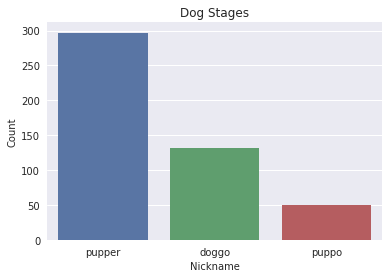

In [75]:
sorted_stage = twitter_archive_clean['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Nickname', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Dog Stages',fontsize=12)

Right off the bat, it's easy to see that "pupper" is the most popular name used amongst the tweets.  It makes sense, even though all dogs are cute, that a puppy would be the most popular.  I would proceed with a little bit of caution with this visual, as it appears only about 500 of the 2,000+ tweets populated a dog stage.

#### 3. Dog Predictions and Confidence Levels

In [78]:
image_prediction_clean.head(5)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog_breed,second_prediction,second_confidence,second_dog_breed,third_prediction,third_confidence,third_dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [80]:
image_prediction_clean['first_prediction'].value_counts().head(20)

Golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
Pug                          57 
Chow                         44 
Samoyed                      43 
Toy_poodle                   39 
Pomeranian                   38 
Cocker_spaniel               30 
Malamute                     30 
French_bulldog               26 
Chesapeake_bay_retriever     23 
Miniature_pinscher           23 
Seat_belt                    22 
Staffordshire_bullterrier    20 
Siberian_husky               20 
German_shepherd              20 
Cardigan                     19 
Web_site                     19 
Name: first_prediction, dtype: int64

The image predictions data set and chart and pretty interesting.  We do have some unrelated item names near the bottom of the query I ran above.  Golden, Lab, Pembroke and Chihuahua are in a league of their own, in terms of the number of times they showed up in the model.  I'm curious; could these predictions be related to the sheer number of images of these breeds on the internet, as the golden and lab are no doubt the two most popular dogs to own.

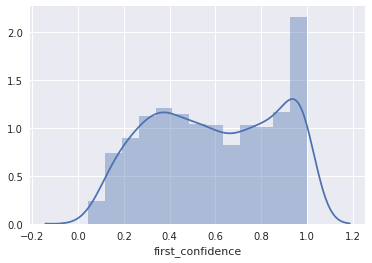

In [82]:
sns.set(style='darkgrid')
ax = sns.distplot(image_prediction_clean['first_confidence'])

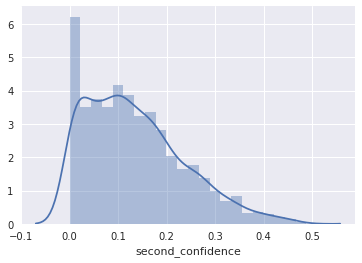

In [83]:
sns.set(style='darkgrid')
ax = sns.distplot(image_prediction_clean['second_confidence'])

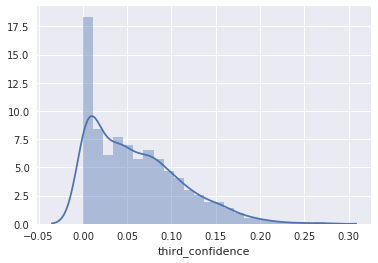

In [84]:
sns.set(style='darkgrid')
ax = sns.distplot(image_prediction_clean['third_confidence'])

(-1.1008745601630092,
 1.1275917683159655,
 -1.1086866580463621,
 1.1197796704326126)

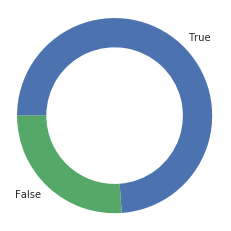

In [92]:
sns.set(style='darkgrid')
sorted_p1 = image_prediction_clean['first_dog_breed'].value_counts()
plt.pie(sorted_p1, labels = sorted_p1.index, startangle = 180, counterclock = False,
       wedgeprops = {'width': 0.3})
plt.axis('square')

The first three charts represent the overall confidence levels of the software, through the three iterations of predictions.  The initial prediction shows a large amount of extremely confident picks.  However, the success rate drops off significantly as you venture into the second and third prediction categories.  The substantial amount of low confidence percentages (0.1 - 0.8) in the first graph is something to worry about, though.  The bottom true/false chart represents how accurate the predictions actually were; roughly 75%.  